In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nidaqmx

# Run tests

Generate a sample waveform. We have ao0 producing an output, which is sent to the Arduino, which modifies it in some way, and then the modified version is read on ai0

In [32]:
sampfreq = 100.0    # Hz
dur = 5    # sec
amp = 1 # V
freq = 0.5   # Hz

t = np.arange(0, dur, step=1.0/sampfreq)
outwave = amp * np.sin(2*np.pi*freq * t) + amp

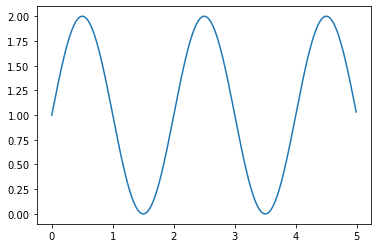

In [33]:
plt.plot(t, outwave)
plt.show()

In [50]:
with nidaqmx.Task() as aitask, nidaqmx.Task() as aotask:
    aitask.ai_channels.add_ai_voltage_chan('Dev1/ai0')
    aitask.timing.cfg_samp_clk_timing(sampfreq)
    
    aotask.ao_channels.add_ao_voltage_chan('Dev1/ao0')
    
    aotask.timing.cfg_samp_clk_timing(sampfreq, source=u"/Dev1/ai/SampleClock")
    aotask.write(outwave, auto_start=True)
    
    aitask.start()
    data = aitask.read(len(outwave), timeout=dur+1)

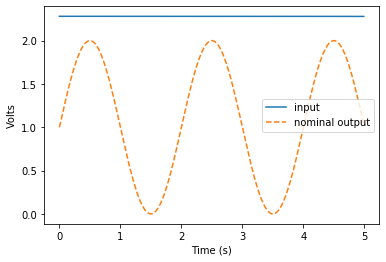

In [51]:
plt.plot(t, data, label='input')
plt.plot(t, outwave, '--', label='nominal output')
plt.xlabel('Time (s)')
plt.ylabel('Volts')
plt.legend(loc='best')
# plt.xlim(0,1)
plt.show()

In [52]:
data

[2.281044372255488,
 2.280715648805586,
 2.2808800105304616,
 2.2803869253562845,
 2.2808800105304616,
 2.2805512870808604,
 2.280715648805586,
 2.2805512870808604,
 2.28137309570599,
 2.2805512870808604,
 2.2808800105304616,
 2.2808800105304616,
 2.281044372255488,
 2.2808800105304616,
 2.280715648805586,
 2.28137309570599,
 2.2808800105304616,
 2.281044372255488,
 2.280715648805586,
 2.280715648805586,
 2.2808800105304616,
 2.2808800105304616,
 2.2808800105304616,
 2.2808800105304616,
 2.280715648805586,
 2.2805512870808604,
 2.281044372255488,
 2.2808800105304616,
 2.2808800105304616,
 2.281208733980664,
 2.281044372255488,
 2.280715648805586,
 2.281044372255488,
 2.281044372255488,
 2.281044372255488,
 2.2808800105304616,
 2.280715648805586,
 2.2808800105304616,
 2.281044372255488,
 2.2808800105304616,
 2.280715648805586,
 2.2808800105304616,
 2.2808800105304616,
 2.2808800105304616,
 2.2808800105304616,
 2.280715648805586,
 2.2805512870808604,
 2.280715648805586,
 2.28088001053046